![](Images/93f668a3af7fd887623cc2b6addf6c62.jpeg)

# Office Supplies Recommendation System
Author: Volha Puzikava
***

## Disclaimer
The described analyses fulfill educational purposes only. The hypothetical business case, made-up data and the results of the performed analyses should not be considered as real recommendations of the seller, and have not been approved by any professional organization or trading company.
***

## Overview
With the rise of technology, people shop online more and more often. But with the beginning of new school year, people use online shopping even more frequently. According to the [National Retail Federation’s annual survey](https://nrf.com/media-center/press-releases/back-school-and-college-spending-reach-828-billion), online retailers are the most popular shopping destination for back-to-college shoppers. More than 50% of consumers shop online for back-to-school items every year. Parents spend record amounts of money to get their kids ready for school.

Companies are also big customers in the office supply world. A company with 1-4 employees has an average office supply cost of up to $1,844 per employee, per year. A well-stocked, uncluttered and organized office is a successful office. The availability of necessary office supplies in the office can minimize downtime and maximize productivity. However, not all employers know exactly what products to provide in order to smooth the working process and make it more efficient.

This project tends to recommend office supplies to the customers based on the reviews that were left by the same customers for the previously bought products. Thus, the project does not only help the retailers in providing high level of personalization and customer tailored services, but also the customers in saving their time and energy. The project also answers the question if it is reasonable for the sellers to offer products in double quntities. 
***

## Business Problem
The Stationary and Co. Company asked to develop a recommendation system of their office supply products in order to reach more sales while providing a high level of presonalization to their customers. The project also answers the question, if it is worth for the company to offer customers their products in the pack of two instead of one.
***

## Data Understanding
The data for the analysis was taken from [Amazon review data (2018)](http://deepyeti.ucsd.edu/jianmo/amazon/index.html) page. The dataframes contained reviews and meta data for office supply products sold on Amazon from 2014 to 2018. The data included 5,581,313 reviews and 315,644 products.
***

## Data Preparation and Exploration
The data was uploaded and analyzed. The columns' names were renamed and the dataframes were merged together on product_ID column. Any missing values and duplicates were dropped. Two dataframes were created from the cleaned data. One dataframe contained ratings, product IDs and reviewers IDs, while the other had titles, category type and product IDs. From the first dataset 100,000 random rows were chosen for further analysis. The second dataset was cleaned again by dropping any existing duplicates (duplicates were formed because different users left reviews for the same products). The datasets were saved as csv files.

In [1]:
# Import necessary library
import pandas as pd

# Load the dataset with reviews
df1 = pd.read_csv('Data/ratings_Office_Products.csv', header=None)
df1.head()

,0,1,2,3
0,A2UESEUCI73CBO,0078800242,5.0,1374192000
1,A3BBNK2R5TUYGV,0113000316,5.0,1359417600
2,A5J78T14FJ5DU,0113000316,3.0,1318723200
3,A2P462UH5L6T57,043928631X,5.0,1356912000
4,A2E0X1MWNRTQF4,0439340039,1.0,1379721600


In [2]:
# Create titles for each column
df1.columns = ['reviewer_ID', 'product_ID', 'rating', 'time']
df1.head()

,reviewer_ID,product_ID,rating,time
0,A2UESEUCI73CBO,0078800242,5.0,1374192000
1,A3BBNK2R5TUYGV,0113000316,5.0,1359417600
2,A5J78T14FJ5DU,0113000316,3.0,1318723200
3,A2P462UH5L6T57,043928631X,5.0,1356912000
4,A2E0X1MWNRTQF4,0439340039,1.0,1379721600


In [3]:
# Load the dataset with meta data
df_meta = pd.read_csv('Data/Office_Products.csv')
df_meta.head()

,title,main_cat,asin
0,Sequential Spelling Level 1 Bundle with Studen...,Office Products,0012624861
1,"Mathematics, Applications and Concepts, Course...",Books,0078652669
2,Pearson MyHistoryLab Online Access Code for Am...,Office Products,0136039847
3,A Pocket for Corduroy,Office Products,0140503528
4,Social Entrepreneurship: What Everyone Needs t...,Books,0195396332


In [4]:
# Rename column name
meta_df = df_meta.rename(columns={"asin" : "product_ID"})
meta_df.head()

,title,main_cat,product_ID
0,Sequential Spelling Level 1 Bundle with Studen...,Office Products,0012624861
1,"Mathematics, Applications and Concepts, Course...",Books,0078652669
2,Pearson MyHistoryLab Online Access Code for Am...,Office Products,0136039847
3,A Pocket for Corduroy,Office Products,0140503528
4,Social Entrepreneurship: What Everyone Needs t...,Books,0195396332


In [5]:
# Merge two datasets on product_ID column
df = df1.merge(meta_df, on = ['product_ID'])
df.head()

,reviewer_ID,product_ID,rating,time,title,main_cat
0,A2P462UH5L6T57,043928631X,5.0,1356912000,Harry Potter Lenticular Hologram Bookmark - Ha...,Office Products
1,A2E0X1MWNRTQF4,0439340039,1.0,1379721600,Learn About Physical Science : Simple Machines,Software
2,AAYGDWCI3LDQP,0439394058,5.0,1405382400,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products
3,AI7SARYVM8FGA,0439394058,4.0,1212624000,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products
4,A1BUVOGGFTGMBN,0439394058,2.0,1389744000,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products


In [6]:
# Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825526 entries, 0 to 825525
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reviewer_ID  825526 non-null  object 
 1   product_ID   825526 non-null  object 
 2   rating       825526 non-null  float64
 3   time         825526 non-null  int64  
 4   title        825525 non-null  object 
 5   main_cat     824583 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 44.1+ MB


In [7]:
# Check for any missing values
df.isnull().sum()

reviewer_ID      0
product_ID       0
rating           0
time             0
title            1
main_cat       943
dtype: int64

In [8]:
# Drop missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824582 entries, 0 to 825525
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reviewer_ID  824582 non-null  object 
 1   product_ID   824582 non-null  object 
 2   rating       824582 non-null  float64
 3   time         824582 non-null  int64  
 4   title        824582 non-null  object 
 5   main_cat     824582 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 44.0+ MB


In [9]:
# Check for any duplicates 
df.duplicated().value_counts()

False    725194
True      99388
dtype: int64

In [10]:
# Drop duplicates
df2 = df.drop_duplicates()
df2.duplicated().value_counts()

False    725194
dtype: int64

In [11]:
# Retrieve the dataset with reviews from the merged data
df_ratings = df2[['reviewer_ID', 'product_ID', 'rating']]
df_ratings.head()

,reviewer_ID,product_ID,rating
0,A2P462UH5L6T57,043928631X,5.0
1,A2E0X1MWNRTQF4,0439340039,1.0
2,AAYGDWCI3LDQP,0439394058,5.0
3,AI7SARYVM8FGA,0439394058,4.0
4,A1BUVOGGFTGMBN,0439394058,2.0


In [12]:
# Check the data type of each column
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725194 entries, 0 to 825525
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reviewer_ID  725194 non-null  object 
 1   product_ID   725194 non-null  object 
 2   rating       725194 non-null  float64
dtypes: float64(1), object(2)
memory usage: 22.1+ MB


In [13]:
# Choose 100,000 random rows
df_final = df_ratings.sample(n=100000)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 482064 to 201886
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reviewer_ID  100000 non-null  object 
 1   product_ID   100000 non-null  object 
 2   rating       100000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.1+ MB


In [14]:
# Save the prepared dataset as csv file
df_final.to_csv('Data/Final_Ratings.csv', index=False)

In [15]:
# Retrieve the dataset with meta data
df_metadata = df2[['product_ID', 'title', 'main_cat']]
df_metadata.head()

,product_ID,title,main_cat
0,043928631X,Harry Potter Lenticular Hologram Bookmark - Ha...,Office Products
1,0439340039,Learn About Physical Science : Simple Machines,Software
2,0439394058,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products
3,0439394058,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products
4,0439394058,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products


In [16]:
# Check for any duplicates
df_metadata.duplicated().value_counts()

True     652324
False     72870
dtype: int64

In [17]:
# Drop duplicates
metadata = df_metadata.drop_duplicates()
metadata.duplicated().value_counts()

False    72870
dtype: int64

In [18]:
# Check the data type of each column
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72870 entries, 0 to 825525
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_ID  72870 non-null  object
 1   title       72870 non-null  object
 2   main_cat    72870 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [19]:
# Save the dataset as csv file
metadata.to_csv('Data/Final_Metadata.csv', index=False)

The distribution of ratings in the rating dataset was plotted. As seen from the graph, people mostly left 5 stars to the products presented on the web site, and 4 and 1 star reviews are almost equally distributed. 

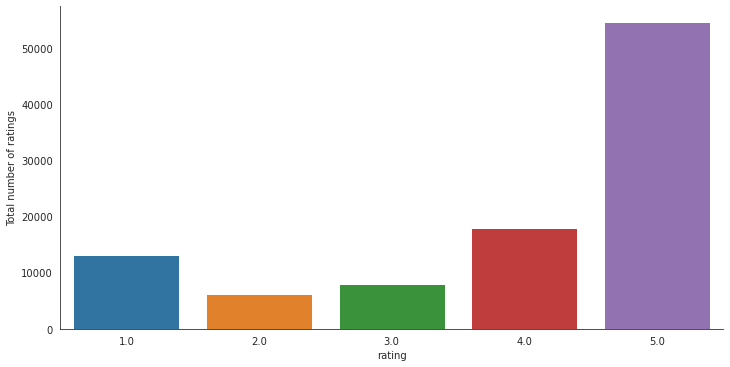

In [20]:
# Import necessary libraries
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df_final, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

g.savefig('distribution_rating');

***

## Data Modeling
The recommendation system was initially built using surprise library. Different types of collaborative filtering engines, ranging from neighborhood-based methods to matrix factorization, were tried out. Later, the recommendation system was built using ALS in Spark programming environment. The different models were compared to see which one performed better. For consistency sake, RMSE was used to evaluate the models.

### Modeling with Surprise Library

In [21]:
# Import necessary library
from surprise import Reader, Dataset

# Read in values as Surprise dataset
reader = Reader()
data = Dataset.load_from_df(df_final, reader)

The number of users and items were checked in the dataset. It helped to determine whether user-user or item-item similarity should be performed. Since there was fewer items, it was more efficient to calculate item-item similarity.

In [22]:
# Look at how many users and items are in the dataset
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  94111 

Number of items:  27452


### Matrix Factorization (Model-Based Method)
#### Singular Value Decomposition (SVD)
Singular-Value Decomposition or SVD is a common and widely used matrix decomposition method. SVD is the factorization of a matrix into 3 matrices: two orthogonal matrices and one nonnegative rectangular diagonal matrix. SVD decreases the dimension of the matrix by extracting its latent factors.

Grid search was implemented to expedite the process of trying out different parameters. The parameter n_jobs was set to -1 to ensure that all of the cores on the computer would be used to process fitting and evaluating all of the models.

In [23]:
# Import necessary libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [24]:
# Perform a gridsearch with SVD 
params = {'n_factors': [20, 50, 100],
          'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD, param_grid=params, n_jobs=-1)
g_s_svd.fit(data)

In [25]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 1.3682281866178423, 'mae': 1.1102841723023609}
{'rmse': {'n_factors': 20, 'reg_all': 0.02}, 'mae': {'n_factors': 20, 'reg_all': 0.02}}


### Neighborhood-Based Methods (Memory-Based)
Pearson correlation was used as a similarity metric. Cross-validatoin was performed to determine the optimal model.

#### KNN Basic Model
KNN approache involves finding the top K nearest neighbors for an item. Ratings from the list of nearest neighbors are combined to predict the unknown rating. This involves finding of all item-item correlations.

In [26]:
# Cross validate with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':False})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

In [27]:
for i in cv_knn_basic.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([1.42692838, 1.42915537, 1.4290986 , 1.43929082, 1.44036736]))
('test_mae', array([1.16284694, 1.16779977, 1.16279838, 1.17158708, 1.16876184]))
('fit_time', (54.472163915634155, 54.41985774040222, 77.0717933177948, 76.74268889427185, 75.1840751171112))
('test_time', (0.24161076545715332, 0.25279784202575684, 0.152357816696167, 0.14374089241027832, 0.17536497116088867))
-----------------------
1.432968105325569


#### KNN Baseline Model
This is a more advanced method because it adds a bias term that is calculated by the way of minimizing a cost function.

In [28]:
# cross validate with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':False})
cv_knn_baseline = cross_validate(knn_baseline, data)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [29]:
for i in cv_knn_baseline.items():
    print(i)
print('-----------------------')
np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([1.37568668, 1.36428585, 1.36228124, 1.37341282, 1.382706  ]))
('test_mae', array([1.12161123, 1.1107468 , 1.11089064, 1.11869795, 1.12474678]))
('fit_time', (14.967533111572266, 15.417960166931152, 15.000866174697876, 14.942620038986206, 15.105854988098145))
('test_time', (0.1434621810913086, 0.14482474327087402, 0.14496994018554688, 0.26378917694091797, 0.1427769660949707))
-----------------------


1.3716745178515029

#### KNN with Means Model
The model takes into account the mean rating of each item.

In [30]:
knn_means = KNNWithMeans(sim_options={'name':'pearson', 'user_based':False})
cv_knn_means = cross_validate(knn_means, data, n_jobs=-1)

In [31]:
for i in cv_knn_means.items():
    print(i)
print('-----------------------')
np.mean(cv_knn_means['test_rmse'])

('test_rmse', array([1.44177359, 1.43235086, 1.42619169, 1.44610968, 1.43069342]))
('test_mae', array([1.16542204, 1.15748521, 1.15709683, 1.16999389, 1.15978846]))
('fit_time', (71.81946325302124, 46.659322023391724, 71.659982919693, 69.3072612285614, 69.05827593803406))
('test_time', (0.139207124710083, 0.21593809127807617, 0.13072705268859863, 0.25986695289611816, 0.26727867126464844))
-----------------------


1.435423848003595

Based off the resulted outputs, it seemed like the best performing model was the SVD model with n_factors equal to 20 and a regularization rate of 0.02. The model had a RMSE of about 1.368 (lowest among the models), meaning that it was off by roughly 1 point for each guess it made for ratings. The SVD model was used to make predictions.

Since the goal of the project was to create recommendations specifically tailored to the customers' preferences, the first step was to create a function that would allow to pick randomly selected products and ask the customers to rate them. If the customers had never used the products, they would be able to skip rating them.

In [32]:
# Write the function to obtain users' ratings
def product_rater(df3, num, category=None):
    reviewer_ID = 'A2P462UH5L6T57'
    rating_list = []
    while num > 0:
        if category:
            product = df3[df3['main_cat'].str.contains(category)].sample(1)
        else:
            product = df3.sample(1)
        print(product)
        rating = input('How do you rate this product on a scale of 1-5, press n if you have not used :\n')
        if rating == 'n':
            continue
        else:
            rating_one_product = {'reviewer_Id':reviewer_ID,
                                  'product_ID':product['product_ID'].values[0],
                                  'rating':rating}
            rating_list.append(rating_one_product) 
            num -= 1
    return rating_list      

In [33]:
# Obtain user ratings
user_rating = product_rater(metadata, 4, 'Books')

        product_ID                                              title main_cat
805525  B00E9G91IS  Pink &laquo;Amor&raquo; Bible / Book Cover - 1...    Books
How do you rate this product on a scale of 1-5, press n if you have not used :
5
      product_ID                                      title main_cat
1601  156472333X  EP-3488 - GR 3 QUICK FLIP FOR COMMON CORE    Books
How do you rate this product on a scale of 1-5, press n if you have not used :
4
        product_ID                                              title main_cat
583277  B0042SWXLK  Is It Sensory or Is It Behavior? Behavior Prob...    Books
How do you rate this product on a scale of 1-5, press n if you have not used :
5
     product_ID                                title main_cat
972  0792293347  USA Classic Political Map Laminated    Books
How do you rate this product on a scale of 1-5, press n if you have not used :
3


Ten recommendations for the new user were made based on the new ratings left by the same user.

In [34]:
# Add the new ratings to the original ratings DataFrame
new_ratings_df = df_final.append(user_rating, ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df[["reviewer_ID", "product_ID", "rating"]], reader)

# Train a model using the new combined DataFrame
svd_ = SVD(n_factors=20, reg_all=0.02)
svd_.fit(new_data.build_full_trainset())

# Make predictions for the user
list_of_products = []
for p_id in df_final['product_ID'].unique():
    list_of_products.append((p_id, svd_.predict('A2P462UH5L6T57', p_id)[3]))
    
# Order the predictions from highest to lowest rated
ranked_products = sorted(list_of_products, key=lambda x:x[1], reverse=True)

# Return the top n recommendations 
def recommended_products(user_ratings, product_df, n):
        for idx, rec in enumerate(user_ratings):
            title = product_df.loc[product_df['product_ID'] == str(rec[0])]['title']
            print('Recommendation # ', idx+1, ': ', title, '\n')
            n-= 1
            if n == 0:
                break
            
recommended_products(ranked_products, metadata, 10)

Recommendation #  1 :  202226    Sharpie Fine Electro Pop Marker, Fine Point, A...
Name: title, dtype: object 

Recommendation #  2 :  283898    Baby Signing Time Volume 1
Name: title, dtype: object 

Recommendation #  3 :  370220    LD Compatible Toner Cartridge Replacement for ...
Name: title, dtype: object 

Recommendation #  4 :  558835    LapWorks 12&quot; Heavy Duty Swivel - for Big ...
Name: title, dtype: object 

Recommendation #  5 :  448188    Quad LCD Monitor Stand desk clamp holds up to ...
Name: title, dtype: object 

Recommendation #  6 :  278497    Canon Photo Paper Plus Semi-Gloss, 13 x 19 Inc...
Name: title, dtype: object 

Recommendation #  7 :  590289    Hewlett Packard BT861AT HP Single Monitor Arm
Name: title, dtype: object 

Recommendation #  8 :  415583    Canon KP-108IN Ink/Paper Set
Name: title, dtype: object 

Recommendation #  9 :  94304    Pilot Precise V5 Rolling Ball Pens, Capped, Ex...
Name: title, dtype: object 

Recommendation #  10 :  290933    EXPO Lo

### Modeling in PySpark
The saved datasets were used to build a recommendation system using the collaborative filtering technique with Spark's Alternating Least Squares implementation.
#### Alternating Least Squares
SparkSession object was initialized and the rating dataset was imported.

In [35]:
# Import necessary library
from pyspark.sql import SparkSession

# Instantiate SparkSession object
spark = SparkSession.builder.master('local').getOrCreate() 

In [36]:
# Read in the dataset into pyspark DataFrame
df = spark.read.csv('Data/Final_Ratings.csv', header='true', inferSchema='true')

# Check the data types of each of the columns
df.dtypes

[('reviewer_ID', 'string'), ('product_ID', 'string'), ('rating', 'double')]

Since reviewer_ID and product_ID columns were of a string type, StringIndexer had to be used. StringIndexer encoded string columns of labels to columns of label indices. After the application of StringIndexer, the ALS model was fit on the training set, the model was evaluated and RMSE of the test set was printed out.

In [37]:
# Import necessary libraries
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# Apply StringIndexer to necessary columns
indexers = [StringIndexer(inputCol="reviewer_ID", outputCol="reviewer_Index"),
            StringIndexer(inputCol="product_ID", outputCol="product_Index")]

# Use pipeline to execute StringIndexer
pipeline = Pipeline(stages=indexers)

# Fit and transform the DataFrame
df_ind = pipeline.fit(df).transform(df)
df_ind.show()

+--------------+----------+------+--------------+-------------+
|   reviewer_ID|product_ID|rating|reviewer_Index|product_Index|
+--------------+----------+------+--------------+-------------+
|A265QLAEX17D81|B001S2PKJ0|   5.0|       32179.0|       3361.0|
|A1E1KH17Q3N0JH|B001B0GWKU|   4.0|       13685.0|       1034.0|
|A3BFAU9ZIPY031|B003U5TV98|   5.0|       59340.0|      10268.0|
|A1VHKONYYNSUPU|B00BF5LREM|   5.0|       25198.0|       5585.0|
|A3E3TAEO67M6WC|B0000C120T|   3.0|       61104.0|         23.0|
|A1AJF7L0LLCFYO|B0027ISA1Y|   1.0|       11426.0|        300.0|
|  ADLVFFE4VBT8|B00015YOR4|   5.0|          28.0|       1205.0|
| ANJNTRCUQA8I4|B0010Z3LGO|   5.0|       85981.0|         31.0|
|A2JMJVNTBL7K7E|B00EU9V5EM|   4.0|        2308.0|        309.0|
| AGGP41D58P0ZW|B002O1E8H4|   3.0|       81321.0|      19028.0|
|A139QJPUBNYPIM|B002VVKZ8S|   3.0|        6638.0|       1145.0|
|A21CV7NID13525|B0074W0EYY|   2.0|       29090.0|      23114.0|
| AIBM79PJK3PIE|B00005RWGX|   1.0|      

In [38]:
# Check the types of each column
df_ind.dtypes

[('reviewer_ID', 'string'),
 ('product_ID', 'string'),
 ('rating', 'double'),
 ('reviewer_Index', 'double'),
 ('product_Index', 'double')]

In [39]:
# Import necessary libraries
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

# Split into training and testing sets
(training, test) = df_ind.randomSplit([0.8, 0.2])

# Build the recommendation model using ALS on the training data
als = ALS(maxIter=10,
          rank=50,
          regParam=0.5,
          userCol='reviewer_Index',
          itemCol='product_Index',
          ratingCol='rating',
          coldStartStrategy='drop')

# Fit the ALS model to the training set
model = als.fit(training)

In [40]:
# Importing appropriate library
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating',
                                predictionCol='prediction')
rmse = evaluator.evaluate(predictions)
print('Root-mean-square error = ' + str(rmse))

Root-mean-square error = 4.191410387087073


Although the RMSE value of the ALS model was much higher than the RMSE of the SVD model, the predictions were still made. ALS is good for large-scaled collaborative filtering problems and slightly different from SVD. Spark attempts to offer a somewhat abstracted approach to the development of algorithms within a distributed computing environment, but it performs much slower.

Before making any recommendations in Spark, the function that took in product_Index and returned a string that represented the product_ID was created. After that the dataset with meta data was imported into a Spark DataFrame. The function that returned the product_ID as a product title was formed. 

In [41]:
# Create a function that returns product_ID
def index_retriever(product_Index, df):
    return df.where(df.product_Index == product_Index).take(1)[0]['product_ID']

In [42]:
# Try the function
index_retriever(1351, df_ind)

'B000K5WIVO'

In [43]:
# Import meta data into a Spark DataFrame
df_meta = spark.read.csv('Data/Final_Metadata.csv', header='true', inferSchema='true')
df_meta.head(5)

[Row(product_ID='043928631X', title='Harry Potter Lenticular Hologram Bookmark - Harry, Ron &amp; Hermoine', main_cat='Office Products'),
 Row(product_ID='0439340039', title='Learn About Physical Science : Simple Machines', main_cat='Software'),
 Row(product_ID='0439394058', title='Scholastic SC939405 All-In-One Schoolhouse Calendar Bulletin Board', main_cat='Office Products'),
 Row(product_ID='0439492092', title="Scholastic Teacher's Friend Happy Thanksgiving! Bulletin Board (TF3073)", main_cat='Office Products'),
 Row(product_ID='0439492602', title='Scholastic TF3281 U.S. Coins and Bills Accent Punch-Outs', main_cat='Office Products')]

In [44]:
# Create a function that returns product title
def product_retriever(product_ID, product_meta_df):
    return product_meta_df.where(product_meta_df.product_ID == product_ID).take(1)[0]['title']

In [45]:
# Try the function
print(product_retriever('B0013CQFZS', df_meta))

Advantus Call Bell, 3.38 Inch Diameter, Chrome Finish with Black Base (CB10000)


A function that took in a new user and some products the user had rated and then returned 10 highest recommended products was created.

In [46]:
def new_reviewer_recs(reviewer_Index, new_ratings, df, rating_df, product_meta_df, num_recs):
    
    # turn the new_recommendations list into a spark DataFrame
    new_reviewer_ratings = spark.createDataFrame(new_ratings, df.columns)
    new_ratings =  pipeline.fit(new_reviewer_ratings).transform(new_reviewer_ratings)
    
    # combine the new ratings df with the rating_df
    product_ratings_combined = rating_df.union(new_ratings)
    
    # create an ALS model and fit it
    als = ALS(maxIter=10,
              rank=50,
              regParam=0.5,
              userCol="reviewer_Index",
              itemCol="product_Index",
              ratingCol="rating",
              coldStartStrategy="drop")
    model = als.fit(product_ratings_combined)
    
    # make recommendations for all users using the recommendForAllUsers method
    recommendations = model.recommendForAllUsers(num_recs)
    
    # get recommendations specifically for the new user that has been added to the DataFrame
    recs_for_user = recommendations.where(recommendations.reviewer_Index == reviewer_Index).take(1)
    
    for ranking, (product_Index, product_ID) in enumerate(recs_for_user[0]['recommendations']):
        index = index_retriever(product_Index, rating_df)
        product = product_retriever(index, product_meta_df)
        print('Recommendation {}: {} | product_ID: {}'.format(ranking+1, product, index))

In [47]:
# Try out the function using the product_Indexes listed below
reviewer_Index = 84718
reviewer_ratings = [(reviewer_Index, 622, 4),
                    (reviewer_Index, 325, 5),
                    (reviewer_Index, 836, 5),
                    (reviewer_Index, 720, 3),
                    (reviewer_Index, 538, 5)]

In [48]:
# Get 10 recommendations for the user
new_reviewer_recs(reviewer_Index,
                  new_ratings=reviewer_ratings,
                  df=df,
                  rating_df=df_ind,
                  product_meta_df=df_meta,
                  num_recs = 10)

Recommendation 1: Tree-Free Greetings Christmas Cuteness Holiday Card Value Assortment, 5 x 7 Inches, 24 Cards and Envelopes per Set, Multi-Color (91188) | product_ID: B005NPOBR0
Recommendation 2: Gift Trenz Humming Bird with Rose Magnetic Bookmark | product_ID: B0013HSHGS
Recommendation 3: Pacific Arc Adjustable Acrylic Triangle 8 in. | product_ID: B004BNBRIG
Recommendation 4: Coin / Cash / Small Parts #7 White Envelopes, 3-1/2&quot; X 6-1/2&quot;, 24lb, 500/box (SY425) | product_ID: B007EWM4JW
Recommendation 5: Ata-Boy DC Superheroes Wonder Woman Mouse Pad | product_ID: B000F1SY2K
Recommendation 6: Sweet Dear Rose Romantic Love Him Husband Her Wife Spouse Friend Beautiful Anniversary Birthday Greetiing Card 5x7 by QuickieCards | product_ID: B005NWXCDW
Recommendation 7: Southworth Soccer Athletic Award Kit, Certificates with Embossed Holders, 10 count (MSK-5) | product_ID: B006MNHIBS
Recommendation 8: Premium Universal Notebook Power Adapter for HP, Sony, Fujitsu, Haier, Toshiba, NEC,

### A/B Testing
The Stationary and Co. Company also asked to design an experiment to test whether it would be more effective for the company's marketing team to offer their products in a pack of two instead of just one. The company said if they had an absolute increase in the buying rate of just 5%, it'd be worth making the change. The company also mentioned that the experiment could be run for a month since they needed to make a decision fast enough before the beginning of a new school year. The company said they had about 6.5 million unique visitors per day and around 25% of them buy some product every day.

It turned out the [standard deviation]( https://www.macroaxis.com/invest/technicalIndicator/AMZN/Standard-Deviation) of the company is 2.74. Since the current buying rate is 25% and 5% rate increase is what the company is looking for, the following hypotheses can be stated:

* Null Hypothesis: the probability of success for the new pack is < 0.3
* Alternative Hypothesis: the probability of success for the new pack is >= 0.3

A power analysis was performed to find the minimum number of samples needed to see an increase of 5% from 25% if a typical power of 0.8 and a conservative alpha of 0.01 were chosen.

In [49]:
# Import necessary libraries
from statsmodels.stats.power import TTestIndPower, TTestPower

# Calculate the required sample size to detect a .05 increase in buying
power_analysis = TTestIndPower()
mean_difference = 0.05
sd = 2.74
effect_size = mean_difference / sd
power_analysis.solve_power(alpha=.01, effect_size=effect_size, power=.80, alternative='larger')

60278.543577176126

It turned out that the minimum number of customers needed for the experiment was 60,279.

Two groups participated in the experiment: a control group that had no change in the amount of packed product and an experiment group that had the updated package. About a month's worth of data for the control and experiment groups was collected (the data was made-up). The data was aggregated in separate files for the two groups. The files contained 28 days with the number of bought products recorded for each day.

In [50]:
# Load the data
control = pd.read_excel('Data/Control.xlsx')
control.head()

,views,bought
0,75348,18837
1,74856,22456
2,63200,12640
3,69800,10470
4,74328,26014


In [51]:
# Load the data
experiment = pd.read_excel('Data/Experiment.xlsx')
experiment.head()

,views,bought
0,77035,12800
1,63840,10050
2,68390,8030
3,79085,6500
4,61320,14302


The data was visualized. Since the frequency of bought products was of interest, the chi-square goodness-of-fit test was used. The first step was to get the data into a format of "observed" (experiment) vs "expected" (control). Then  the Chi-Square Goodness of Fit Test using the chisquare function from the SciPy library was performed.

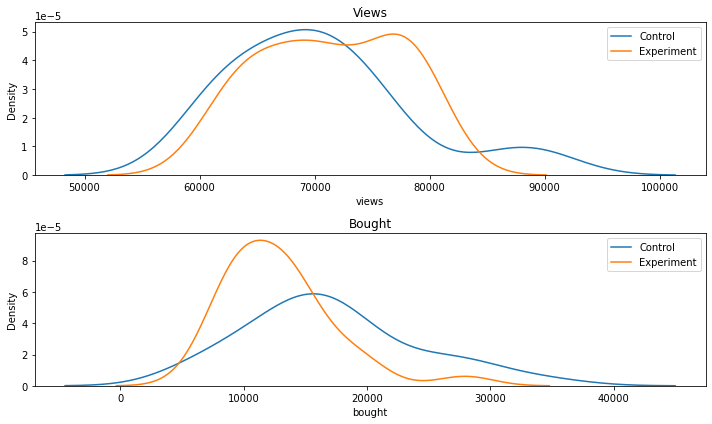

In [52]:
# Visualize the data
import matplotlib.pyplot as plt
f, (ax0,ax1) = plt.subplots(nrows=2, figsize=(10,6))

# Views
ax0.set_title('Views')
sns.kdeplot(data=control.views, ax=ax0, label='Control')
sns.kdeplot(data=experiment.views, ax=ax0, label='Experiment')
ax0.legend()

# Bought
ax1.set_title('Bought')
sns.kdeplot(data=control.bought, ax=ax1, label='Control')
sns.kdeplot(data=experiment.bought, ax=ax1, label='Experiment')
ax1.legend()

plt.tight_layout()

In [53]:
# Sum all the days together to see an overall change
control_views = sum(control.views)
control_bought = sum(control.bought)

experiment_views = sum(experiment.views)
experiment_bought = sum(experiment.bought)

In [54]:
# Create two arrays to hold "observed" and "expected" numbers
observations = np.array([experiment_bought, experiment_views - experiment_bought])
expectations = np.array([control_bought, control_views - control_bought])

print('OBSERVED (expermiment):', observations)
print('EXPECTED (control):', expectations)

OBSERVED (expermiment): [ 373031 1697245]
EXPECTED (control): [ 495361 1545442]


In [55]:
# Import necessary library
import scipy.stats as stats

# Perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=observations, f_exp=expectations)

Power_divergenceResult(statistic=45120.58408431016, pvalue=0.0)

In [56]:
# Calculate the difference between the experiment and control
experiment_percent = experiment_bought/experiment_views*100
print(f'Percent Experiment Bought: {experiment_percent:.5}%')
control_percent = control_bought/control_views*100
print(f'Percent Control Bought: {control_percent:.5}%')
print(f'Difference between experiment & control {experiment_percent-control_percent:.3}%')

Percent Experiment Bought: 18.018%
Percent Control Bought: 24.273%
Difference between experiment & control -6.25%


Since the p-value was less than 0.01, the null hypothesis was rejected. We're 99% confident that there was an observable effect in buying rate by changing the quantity in the pack of the products. The difference in package was observed to decrease the buying rate by an absolute amount of about 6.25%. This change cannot be made valuable since we are confident that the effect was real.
***

### Evaluation
Thus, it was possible to conclude that the best model for the recommendation system was the SVD model with the lowest RMSE value of 1.368. That model was off by roughly 1 point for each guess it made for ratings. The Singular-Value Decomposition is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. The method is faster and more stable than other methods.

The A/B Testing showed that the change in the package of the products (pack of two instead of one) would decrease the buying rate by about 6.25%. Thus, we can confidently conclude, that the mentioned change will not be worth to implement.
***

### Conclusions
Thus, for the Stationary and Co. Company we can advise to use the SVD model for the recommendation system of their office products in order to provide a high level of presonalization to their customers. As concerns the change in the package quantity, we are 99% confident that there is an observable effect in buying rate if the changes are made. However, offering a pack of two instead of one will decrease the buying rate by about 6.25%. Thus, we can advise not to implement any changes in the package quantity.

Of coarse, the models are not ideal and more digging can be beneficial. Thus, we can try to tune the ALS model and see if it can work any better. As concerns the A/B testing, the company should come out with some other ideas how to increase sales, like changing the website by making it more user-friendly or just offering discounts on the customers' birthdays...
***

### Reproduction Instructions
This project uses:

* [Anaconda](https://www.anaconda.com), a package and environment management tool
* Python 3.8.5, with the following additional packages/libraries:
  * Pandas 1.1.3
  * NumPy 1.18.5
  * Matplotlib 3.3.1
  * Seaborn 0.11.0
  * Scikit-Learn 0.23.2
  * Scikit-Surprise 1.1.1
  * PySpark 3.0.0
  
If you would like to follow the analysis locally and have the above tools:
* Fork and clone this repository.
* Go to the [Amazon review data (2018)](http://deepyeti.ucsd.edu/jianmo/amazon/index.html) page and download the data files.
* You should then be able to run the analysis in the provided [Office_Supplies Jupyter Notebook](https://github.com/VolhaP87/Office_Supplies_Recommendation_System/blob/main/Office_Supplies.ipynb).
***

### Sources
* [Amazon review data (2018)](http://deepyeti.ucsd.edu/jianmo/amazon/index.html) page
* [Recommendation System Presentation](https://github.com/VolhaP87/Office_Supplies_Recommendation_System/blob/main/Recommendation%20System%20Presentation.pdf)
***

### Contact Information
With questions or feedback on this repository, please reach out via:
* [GitHub](https://github.com/VolhaP87?tab=repositories)
* [LinkedIn](https://www.linkedin.com/in/volha-puzikava-2319294a/)